# 1. Euclidean and Manhattan Distance Calculations

In this short mini project, you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

# 2. Dependencies

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.spatial.distance as dist
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Load Data

In [3]:
# Load Course Numerical Dataset
df = pd.read_csv(
      '/content/drive/MyDrive/Colab Notebooks/data/15.2.distance_dataset.csv'
    , index_col = 0
)

In [4]:
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


Now, let's visualize the difference between the $\small\textbf{Euclidean}$ and $\small\textbf{Manhattan distance}$.

# 4. Euclidean Distance

* Euclidean distance is also known as the $\small\textbf{straight-line distance}$ or $\small\textbf{2-norm distance}$. It's named after the ancient Greek mathematician Euclid.

* It is defined as the length of the shortest path between two points in a Euclidean space (such as two points in a 2D or 3D plane).

* Euclidean distance is calculated using the $\small\textbf{Pythagorean theorem}$, which gives the length of the hypotenuse of a right triangle:

\begin{equation}
\large\text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
\tag{1}
\end{equation}

* We are using Pandas to load our dataset <code><b>.csv</b></code> file and use Numpy to compute the <b>Euclidean distance</b> to the point <code><b>(Y=5, Z=5)</b></code> that we choose as reference.

* On the left here, we show the dataset projected onto the <code><b>YZ</b></code> plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

> <b>NOTE:</b> The SciPy library comes with optimized functions written in C to compute distances (in the <code><b>scipy.spatial.distance</b></code> module) that are much faster than our (naive) implementation.

## 4.1. EX 1

In [7]:
# In the Y-Z plane, we compute the distance to ref point (5, 5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

Create a distance to reference point <code><b>(3, 3)</b></code> matrix similar to the above example.

## 4.2. EX 2

In [6]:
# In the Y-Z plane, we compute the distance to ref point (3, 3)
distEuclid = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

Replace the value set to <code><b>c</b></code> in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances.

## 4.3. Visualize

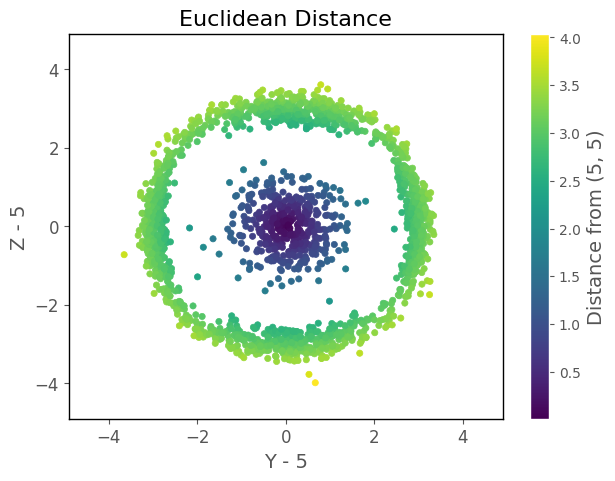

In [20]:
# Set the background color to white
plt.rcParams['axes.facecolor'] = 'white'

# Create a figure
figEuclid = plt.figure(
    figsize=[7, 5]
)

# Create the scatter plot
# Use a colormap for better visualization
scatter = plt.scatter(
      df['Y'] - 5
    , df['Z'] - 5
    , c    = distEuclid
    , s    = 20
    , cmap = 'viridis'
)

plt.ylim([-4.9, 4.9])
plt.xlim([-4.9, 4.9])

# Set labels and title
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance', size=16)

# Add colorbar
# Use the scatter plot to specify the colorbar
cb = plt.colorbar(
    scatter
)

cb.set_label(
      'Distance from (5, 5)'
    , size = 14
)

# Set axis colors and show gridlines
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(True, linestyle='--')

# Adjust tick label size
plt.tick_params(
      axis      = 'both'
    , which     = 'both'
    , labelsize = 12
)

# Show the plot
plt.show()

# 5. Manhattan Distance

* Manhattan distance is simply the sum of absolute differences between the points coordinates.

* This distance is also known as the $\small\textbf{taxicab}$ , $\small\textbf{city block distance}$, or $\small\textbf{L1 distance}$ as it measure distances along the coorinate axis which creates $\small\textbf{paths}$ that look like a cab's route on a grid-style city map.

\begin{equation}
\large\text{Manhattan Distance} = \sum_{i=1}^{n}|x_i - y_i|
\tag{2}
\end{equation}

## 5.1. EX 1

We display the dataset projected on the <code><b>XZ</b></code> plane here color coded per the Manhattan distance to the <code><b>(X=5, Z=5)</b></code> reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [21]:
# In the Y-Z plane, we compute the distance to ref point (5, 5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

## 5.2. EX 2

Create a Manhattan distance to reference point <code><b>(4, 4)</b></code> matrix similar to the above example and replace the value for <code><b>c</b></code> in the plotting cell to view the result.

In [22]:
# In the Y-Z plane, we compute the distance to ref point (4, 4)
distManhattan = np.abs(df.X - 4) + np.abs(df.Z - 4)

## 5.3. Visualize

Now let's create distributions of these distance metrics and compare them. We leverage the the <code><b>scipy.spatial.distance</b></code> function to create these matrices similar to how you manually created them earlier in the exercise.

In [32]:
mat = df[['X','Y','Z']].to_numpy()

DistEuclid = dist.pdist(
      mat
    ,'euclidean'
)

DistManhattan = dist.pdist(
      mat
    , 'cityblock'
)

largeMat = np.random.random((10000,100))

Plot histograms of each distance matrix for comparison:

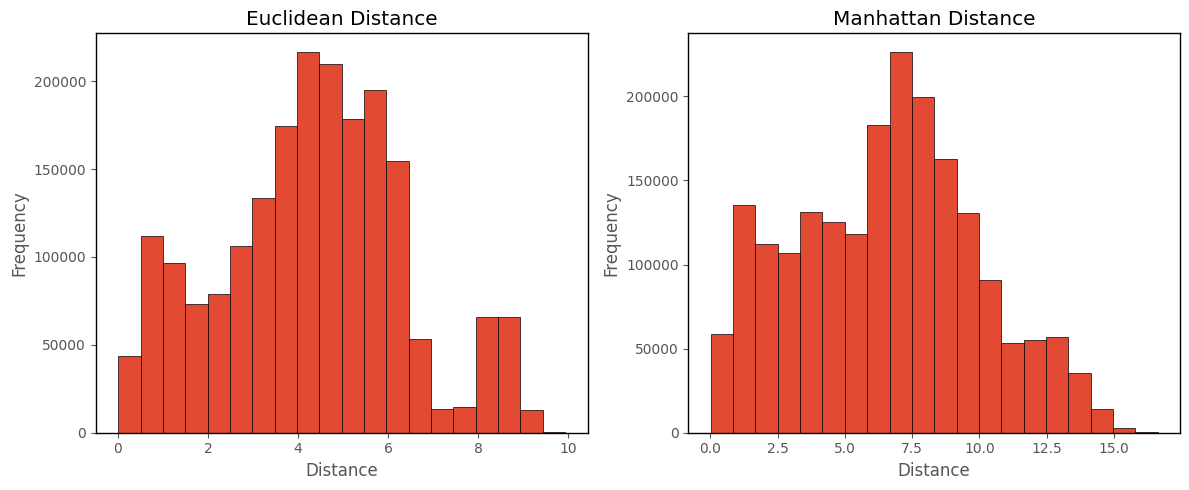

In [43]:
# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

histograms = []  # To store histograms

for ax, dist_data, title in zip(axes, [DistEuclid, DistManhattan], ['Euclidean Distance', 'Manhattan Distance']):
    hist, bin_edges = np.histogram(dist_data, bins=20)
    histograms.append((hist, bin_edges))  # Store histogram data

    ax.hist(dist_data, bins=20, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Frequency')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

plt.tight_layout()
plt.show()

# 6. Results & Discussions

In [55]:
# Access histogram data for Euclidean and Manhattan distances
hist_euclidean, bin_edges_euclidean = histograms[0]
hist_manhattan, bin_edges_manhattan = histograms[1]

# Format and print histogram data
print("Histogram Data for Euclidean Distance:")
for i, (start, end, value) in enumerate(zip(bin_edges_euclidean[:-1], bin_edges_euclidean[1:], hist_euclidean)):
    print(f"Bin {str(i + 1).zfill(2)} - Range:[{start:.2f} - {end:.2f}], Frequency: {value}")

print("\n" + "-"*40 + "\n")

print("Histogram Data for Manhattan Distance:")
for i, (start, end, value) in enumerate(zip(bin_edges_manhattan[:-1], bin_edges_manhattan[1:], hist_manhattan)):
    print(f"Bin {str(i + 1).zfill(2)} - Range:[{start:.2f} - {end:.2f}], Frequency: {value}")

Histogram Data for Euclidean Distance:
Bin 01 - Range:[0.01 - 0.50], Frequency: 43897
Bin 02 - Range:[0.50 - 1.00], Frequency: 111708
Bin 03 - Range:[1.00 - 1.50], Frequency: 96666
Bin 04 - Range:[1.50 - 1.99], Frequency: 73215
Bin 05 - Range:[1.99 - 2.49], Frequency: 79162
Bin 06 - Range:[2.49 - 2.98], Frequency: 106002
Bin 07 - Range:[2.98 - 3.48], Frequency: 133564
Bin 08 - Range:[3.48 - 3.98], Frequency: 174491
Bin 09 - Range:[3.98 - 4.47], Frequency: 216348
Bin 10 - Range:[4.47 - 4.97], Frequency: 209452
Bin 11 - Range:[4.97 - 5.46], Frequency: 178668
Bin 12 - Range:[5.46 - 5.96], Frequency: 194985
Bin 13 - Range:[5.96 - 6.46], Frequency: 154268
Bin 14 - Range:[6.46 - 6.95], Frequency: 53073
Bin 15 - Range:[6.95 - 7.45], Frequency: 13678
Bin 16 - Range:[7.45 - 7.94], Frequency: 14678
Bin 17 - Range:[7.94 - 8.44], Frequency: 65610
Bin 18 - Range:[8.44 - 8.94], Frequency: 66054
Bin 19 - Range:[8.94 - 9.43], Frequency: 13004
Bin 20 - Range:[9.43 - 9.93], Frequency: 477

-------------

<b>1. Range of Distances</b>

* For Euclidean Distance, the distances approximately lie within range <code><b>[0.01, 9.93]</b></code> .

* For Manhattan Distance, the distances approximately lie within range <code><b>[0.01, 16.63]</b></code> .

<b>2. Frequency Distribution</b>

* Euclidean Distance
  
  * The highest frequency occurs in <b>Bin 9</b>, with a frequency of <code><b>216,348</b></code> .
  
  * Generally, the frequency decreases as distances increase, with some fluctuations.

* Manhattan Distance:
  
  * The highest frequency occurs in <b>Bin 9</b>, with a frequency of <code><b>226,198</b></code> .

  * Similar to Euclidean Distance, the frequency generally decreases as distances increase, with some fluctuations.

<b>3. Range Comparison</b>

* Manhattan Distance tends to have a wider range of distances and higher frequencies for larger distances compared to Euclidean Distance.

* Euclidean Distance is bounded by the Euclidean space's dimensions, resulting in a shorter range.